# Visualizations

Many ideas and examples from this lecture come from my visualization teacher Dr. Jurgen Symanzik. 

Dr. Symanzik's 9 rules to make a bad visualization https://math.usu.edu/~symanzik/teaching/2011_stat6560/lect_main_02_01_2011_full.pdf

## Rules for Good Visualizations

- Is your visualization representing the truth of the data?
- Are parts of your visualization taking away from the data?
- Is the scale of the data and the data range chosen correct?
- Are all axes labeled correctly and is other relevent information placed on the chart?
- Do the colors you chose help seperate or show the data is continuous? 
- Are the colors colorblind safe?
- Does the visualization you made tell the story that you want to portray?

## Import Packages

In [98]:
import pandas as pd
import plotnine as p9
from IPython.display import Image
from IPython.core.display import HTML 

## Read in Dataset

In [6]:
vg_data = pd.read_csv('data/vgsales.csv')

In [7]:
vg_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Unique Years

In [8]:
vg_data.Year.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [9]:
vg_data[['Year', 'Name']].groupby('Year').count()

,Name
Year,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Since the newer dates haven't been covered yet, we will use 2016 data as that is the closest data we have that is complete to this year

## Tables vs Visualization

In [10]:
jp_sales_by_genre = vg_data[vg_data['Year'] == 2016].groupby('Genre').sum()['JP_Sales'].sort_values()

In [11]:
jp_sales_by_genre = jp_sales_by_genre.reset_index().rename(columns = {'JP_Sales':'JP_Sales_millions'})

### Table

In [12]:
print(jp_sales_by_genre)

           Genre  JP_Sales_millions
0         Racing               0.01
1       Strategy               0.05
2       Platform               0.11
3     Simulation               0.30
4        Shooter               0.61
5       Fighting               0.64
6         Sports               0.78
7           Misc               0.81
8      Adventure               0.97
9   Role-Playing               3.63
10        Action               5.79


### Visualization

<AxesSubplot:xlabel='Genre', ylabel='Japan Sales in Millions'>

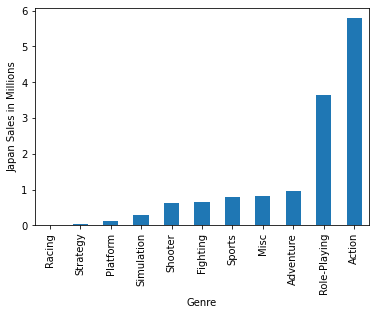

In [13]:
jp_sales_by_genre.plot(kind = 'bar',
                       x = 'Genre',
                       y = 'JP_Sales_millions',
                       ylabel = 'Japan Sales in Millions',
                       xlabel = 'Genre',
                       legend = False)

When presenting data, it is almost always better to show some sort of graphic over a table. However, there are a few times in my career where showing tables has been a better choice

- Some people want to see the raw data
- If you want to address many different questions with a smaller group when figuring about a problem

## Representing the Truth of the Data

In [14]:
total_sales_by_publisher = vg_data[vg_data['Year'] == 2016].groupby('Publisher').sum()['Global_Sales'].sort_values().reset_index()

In [15]:
total_sales_by_publisher = \
    total_sales_by_publisher[(total_sales_by_publisher['Publisher'] == 'Atlus') | 
    (total_sales_by_publisher['Publisher'] == '505 Games') | 
    (total_sales_by_publisher['Publisher'] == 'Nippon Ichi Software') | 
    (total_sales_by_publisher['Publisher'] == 'Sega')]

### Manipulated Baseline

<AxesSubplot:xlabel='Publisher', ylabel='Global Sales in Millions'>

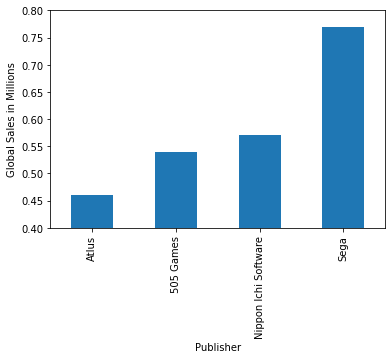

In [16]:
total_sales_by_publisher.plot(kind = 'bar',
                       x = 'Publisher',
                       y = 'Global_Sales',
                       ylabel = 'Global Sales in Millions',
                       xlabel = 'Publisher',
                       ylim = (0.4,0.8),
                       legend = False)

### 0 Baseline

<AxesSubplot:xlabel='Publisher', ylabel='Global Sales in Millions'>

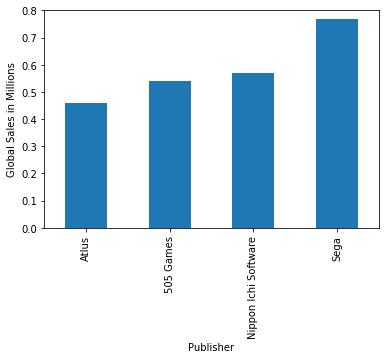

In [17]:
total_sales_by_publisher.plot(kind = 'bar',
                       x = 'Publisher',
                       y = 'Global_Sales',
                       ylabel = 'Global Sales in Millions',
                       xlabel = 'Publisher',
                       ylim = (0,0.8),
                       legend = False)

A manipulated baseline can make it appear that the lines are farther apart when in fact they are not.

### Stacked Bar Chart

In [66]:
percentage_sales = vg_data[(vg_data['Year'] == 2016) | (vg_data['Year'] == 2015)].groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

global_2016 = percentage_sales.Global_Sales
percentage_sales['NA'] = percentage_sales.NA_Sales / global_2016
percentage_sales['EU'] = percentage_sales.EU_Sales / global_2016
percentage_sales['JP'] = percentage_sales.JP_Sales / global_2016
percentage_sales['Other'] = percentage_sales.Other_Sales / global_2016
percentage_sales.reset_index(inplace = True)

In [67]:
percentage_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA,EU,JP,Other
0,2015.0,102.82,97.71,33.72,30.01,264.44,0.388822,0.369498,0.127515,0.113485
1,2016.0,22.66,26.76,13.70,7.75,70.93,0.319470,0.377273,0.193148,0.109263


In [68]:
# unpivot dataset
percentage_sales = pd.melt(percentage_sales, 
                           id_vars = ['Year'],
                           value_vars = ['NA', 
                                         'EU', 
                                         'JP', 
                                         'Other'])

percentage_sales.rename(columns = {'variable':'Sales',
                                   'value': 'Percent_Sales'}, inplace = True)

In [69]:
percentage_sales

,Year,Sales,Percent_Sales
0,2015.0,NA,0.388822
1,2016.0,NA,0.319470
2,2015.0,EU,0.369498
3,2016.0,EU,0.377273
4,2015.0,JP,0.127515
5,2016.0,JP,0.193148
6,2015.0,Other,0.113485
7,2016.0,Other,0.109263


When you have more than 2 levels, stacked barcharts with percentages are not as useful since it is hard for the human eye to know where the baseline is.

/home/cam/.local/lib/python3.6/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


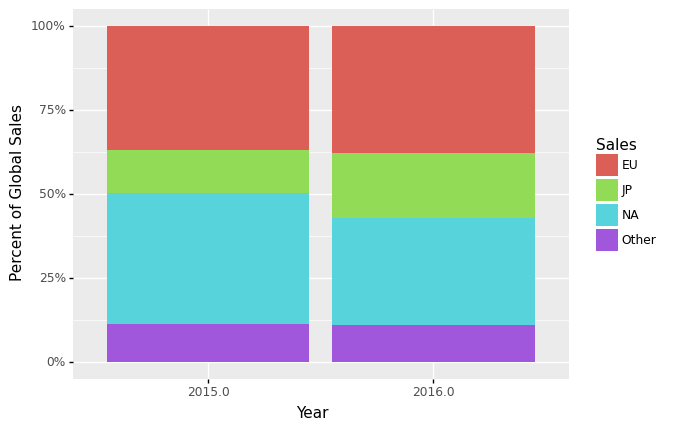

<ggplot: (8765302023870)>

In [85]:
p9.ggplot(percentage_sales) \
 + p9.geom_bar(p9.aes(y = 'Percent_Sales', 
                      x = 'factor(Year)', 
                      fill = 'Sales'), stat="identity") \
 + p9.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) \
 + p9.ylab('Percent of Global Sales') \
 + p9.xlab('Year')


Although this plot looks okay, imagine if the groups did not line up as nicely from  year to year. 

### Side by Side Bar Chart

A better way to compare categories year over year would be to use side by side bar charts

/home/cam/.local/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/cam/.local/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/red_green.png
/home/cam/.local/lib/python3.6/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/cam/.local/lib/python3.6/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


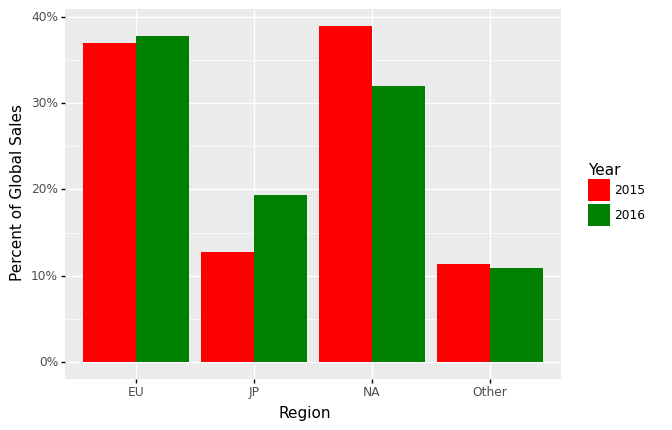

<ggplot: (8765301916073)>

In [103]:
plt = p9.ggplot(percentage_sales) \
     + p9.geom_bar(p9.aes(y = 'Percent_Sales', 
                      x = 'factor(Sales)',
                      group = 'factor(Year)',
                      fill = 'factor(Year)'), stat="identity", position = 'dodge') \
     + p9.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) \
     + p9.guides(fill=p9.guide_legend(title="Year")) \
     + p9.scale_fill_manual(values = ['red', 'green']) \
     + p9.ylab('Percent of Global Sales') \
     + p9.xlab('Region')

plt.save('images/red_green.png')

plt



## Are the Colors we Use Good?

About 1 in 8 men are color blind in the United States. To make your plots easily readable for all audiences, it is important to think about what colors to use. Below is what the plot above would look like for someone with red-green color blindness. https://www.color-blindness.com/coblis-color-blindness-simulator/

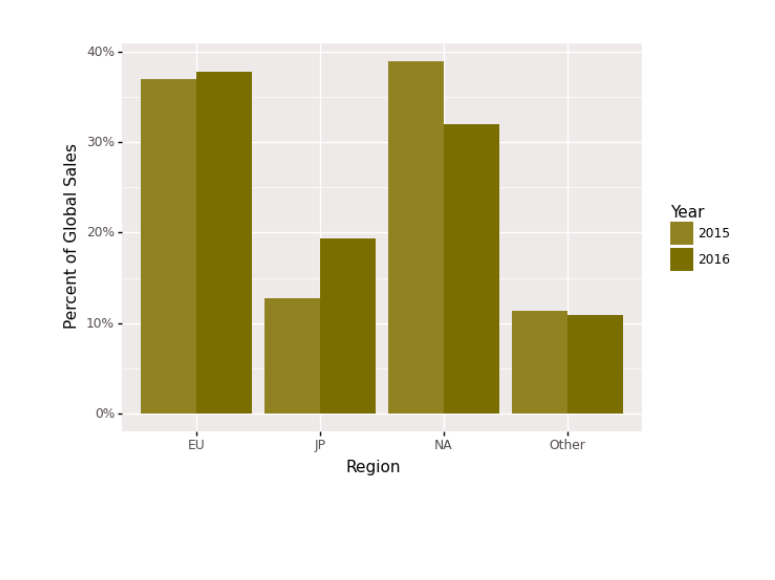

In [105]:
Image(filename = 'images/red_green_changed.png')

An easy way to find good color schemes that are color blind and printer friendly is to use the color brewer website.
https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

## In Class Exercise

Build visualizations shows the Sales of the PS4, Xbox One, and WiiU in 2015 and 2016. How did each system perform in the given years? 